# Fraud Detection

In [1]:
# importing basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading of dataset
data = pd.read_csv("Fraud.csv")

In [3]:
# Viewing first 5 rows from the csv file
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
# Checking the shape of the dataset
data.shape

(6362620, 11)

In [5]:
# info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
# description of dataset
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
# Checking unique values in the dataset
data.nunique().sort_values(ascending=True)

isFraud                 2
isFlaggedFraud          2
type                    5
step                  743
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
newbalanceDest    3555499
oldbalanceDest    3614697
amount            5316900
nameOrig          6353307
dtype: int64

## Preprocessing and Visualization of the dataset

In [8]:
# Checking the null values 
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### For checking outliers we use the boxplot 

<AxesSubplot:xlabel='isFraud', ylabel='isFlaggedFraud'>

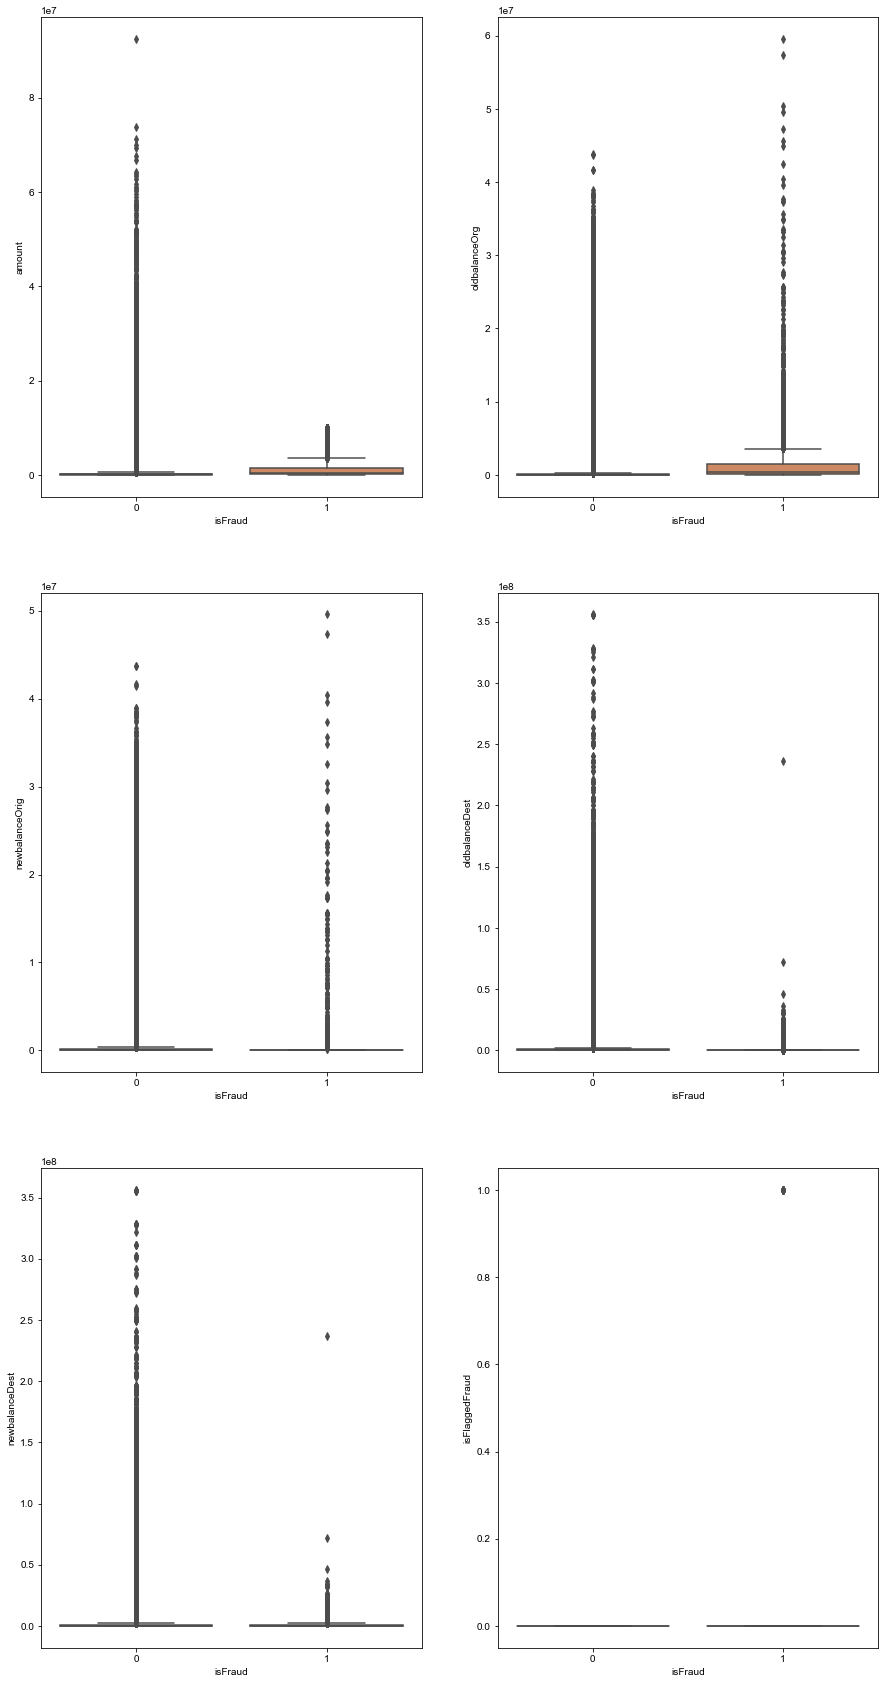

In [9]:
fig,ax=plt.subplots(3,2,figsize=(15,30))
sns.set_theme(style="whitegrid")
sns.boxplot(x=data["isFraud"],y=data["amount"],ax=ax[0][0])
sns.boxplot(x=data["isFraud"],y=data["oldbalanceOrg"],ax=ax[0][1])
sns.boxplot(x=data["isFraud"],y=data["newbalanceOrig"],ax=ax[1][0])
sns.boxplot(x=data["isFraud"],y=data["oldbalanceDest"],ax=ax[1][1])
sns.boxplot(x=data["isFraud"],y=data["newbalanceDest"],ax=ax[2][0])
sns.boxplot(x=data["isFraud"],y=data["isFlaggedFraud"],ax=ax[2][1])


<AxesSubplot:xlabel='type', ylabel='count'>

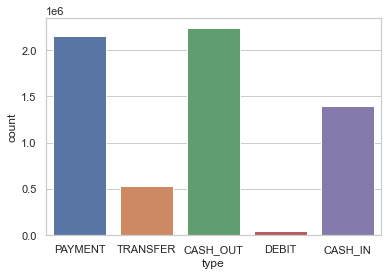

In [10]:
# Checking the frequency of type of transaction
sns.countplot(x='type',data=data)

In [11]:
print("Total Unique Values in nameOrig", data['nameOrig'].nunique())
print("Total Unique Values in nameDest", data['nameDest'].nunique())

Total Unique Values in nameOrig 6353307
Total Unique Values in nameDest 2722362


### Checking multi-collinearity

In [12]:
# Checking multi-collinearity using variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

data_without_text=pd.DataFrame({"step":data.step,
                                "amount":data.amount,
                               "oldbalanceOrg":data.oldbalanceOrg,
                               "newbalanceOrig":data.newbalanceOrig,
                               "oldbalanceDest":data.oldbalanceDest,
                               "newbalanceDest":data.newbalanceDest,
                               "isFraud":data.isFraud,
                               "isFlaggedFraud":data.isFlaggedFraud})
vif_data = pd.DataFrame()
vif_data["feature"] = data_without_text.columns
  
vif_data["VIF"] = [variance_inflation_factor(data_without_text.values, i)
                          for i in range(len(data_without_text.columns))]
  
print(vif_data)

          feature         VIF
0            step    1.191094
1          amount    4.078952
2   oldbalanceOrg  544.053103
3  newbalanceOrig  546.346008
4  oldbalanceDest   72.895522
5  newbalanceDest   84.584619
6         isFraud    1.188386
7  isFlaggedFraud    1.002546


#### After above operation we see amount column contains outliers 
#### oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest columns contains multicollinerity 
#### Debit type transaction are very low
#### Prevention from multi-collinerity
     * We will remove oldbalnceorg and newbalaceorig and add the difference of column in the data set
     * Similarly for oldbalanceDest and newbalanceDest.

In [13]:
# Handling Multi-collinearity 
old_balance=data["oldbalanceOrg"]
new_balance=data["newbalanceOrig"]
bal_change=[] #if balace deduct then 1 else 0
for i in range(len(old_balance)):
  diff=new_balance[i]-old_balance[i]
  if diff>0:
      bal_change.append(0)
  else:
      bal_change.append(1)

In [14]:
dest_old=data["oldbalanceDest"]
dest_new=data["newbalanceDest"]
dest_bal_change=[]
dest_bal=[]
for i in range(len(dest_old)):
    diff=dest_new[i]-dest_old[i]
    if diff>0:
        dest_bal_change.append(0)
        dest_bal.append(abs(diff))
    else:
        dest_bal_change.append(1)
        dest_bal.append(abs(diff))

In [15]:
data["source_bal_change"]=bal_change
data["destination"]=dest_bal
data["dest_bal_chnage"]=dest_bal_change

In [16]:
# Dropping irrelevant columns
data.drop(["oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"],axis=1,inplace=True)

In [17]:
data.head()

,step,type,amount,nameOrig,nameDest,isFraud,isFlaggedFraud,source_bal_change,destination,dest_bal_chnage
0,1,PAYMENT,9839.64,C1231006815,M1979787155,0,0,1,0.0,1
1,1,PAYMENT,1864.28,C1666544295,M2044282225,0,0,1,0.0,1
2,1,TRANSFER,181.00,C1305486145,C553264065,1,0,1,0.0,1
3,1,CASH_OUT,181.00,C840083671,C38997010,1,0,1,21182.0,1
4,1,PAYMENT,11668.14,C2048537720,M1230701703,0,0,1,0.0,1


In [18]:
result=data["isFraud"]
data.drop("isFraud",axis=1,inplace=True)

In [19]:
# Checking for the class imbalanced dataset
True_fraud=np.sum(result==1)
False_fraud=np.sum(result==0)
print(True_fraud)
print(False_fraud)

8213
6354407


#### From the above operation it is clearly visible that data is imbalanced and it may cause the model to overfit 
#### Prevention:
     * We will do the downsampling so that data is balance and doesn't overfit
### Firstly we see how model will ttrain on imbalanced dataset     

In [20]:
#Splitting the dataset for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,result,test_size=0.20,random_state=42)

In [21]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5090096, 9)
(1272524, 9)
(5090096,)
(1272524,)


#### Handling categorical data

In [22]:
from sklearn import preprocessing  
le = preprocessing.LabelEncoder()
le.fit(data["type"])
train_type=le.transform(x_train["type"])
test_type=le.transform(x_test["type"])

In [23]:
le2=preprocessing.LabelEncoder()
le2.fit(data["nameOrig"])
train_nameOrig=le2.transform(x_train["nameOrig"])
test_nameOrig=le2.transform(x_test["nameOrig"])

In [24]:
le3=preprocessing.LabelEncoder()
le3.fit(data["nameDest"])
train_nameDest=le3.transform(x_train["nameDest"])
test_nameDest=le3.transform(x_test["nameDest"])

In [25]:
x_train.drop(["type","nameOrig","nameDest"],axis=1,inplace=True)

In [26]:
x_train["type"]=train_type
x_train["nameOrig"]=train_nameOrig
x_train["nameDest"]=train_nameDest

In [27]:
x_train.head()

,step,amount,isFlaggedFraud,source_bal_change,destination,dest_bal_chnage,type,nameOrig,nameDest
6271196,619,386385.08,0,0,386385.08,1,0,4449199,289167
1888243,164,212458.78,0,0,212458.78,1,0,5813773,204382
5549957,382,19967.60,0,1,0.00,1,3,5870502,1346491
2025342,180,527616.51,0,1,527616.51,0,1,5095916,446948
682342,36,206067.85,0,1,206067.84,0,4,5557736,338417


In [28]:
x_test.drop(["type","nameOrig","nameDest"],axis=1,inplace=True)

In [29]:
x_test["type"]=test_type
x_test["nameOrig"]=test_nameOrig
x_test["nameDest"]=test_nameDest

In [30]:
x_test.head()

,step,amount,isFlaggedFraud,source_bal_change,destination,dest_bal_chnage,type,nameOrig,nameDest
3737323,278,330218.42,0,0,330218.42,1,0,5144186,523341
264914,15,11647.08,0,1,0.00,1,3,868156,1849210
85647,10,152264.21,0,0,152264.21,1,0,2453021,179836
5899326,403,1551760.63,0,1,1551760.63,0,4,4162339,167013
2544263,206,78172.30,0,0,78172.30,1,0,5740614,27202


### Fraud Detection Model 
* Here i used the XGBOOST algorithm to train our model
* It is an ensemble learning algorithm meaning that it combines the results of many models, called base learners to make a prediction.
* It is effective with large dataset.
* Unlike any other classification algorithm we don't need to worry about the outliers as it is not influenced by them.

In [31]:
# Importing model 
import xgboost as xgb
xgb_model  = xgb.XGBClassifier()

In [32]:
# Hyperparameter tuning using gridsearchcv
from sklearn.model_selection import GridSearchCV
parameters = {"max_depth":[1,2,3,4] }
clf = GridSearchCV(xgb.XGBClassifier(), parameters, cv=3, scoring='roc_auc',return_train_score=True,n_jobs=-1)
clf.fit(x_train,y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1, param_grid={'max_depth': [1, 2, 3, 4]},
             return_train_score=True, scoring='roc_auc')

### Here we perform the gridsearchcv to find out which parameter we should include during fitting of our model

Best Parameter {'max_depth': 4}


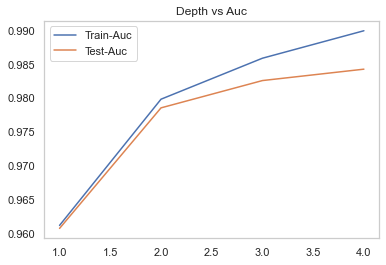

In [33]:
# Finding the best parameter for the model after hyperparameter tuning
import matplotlib.pyplot as plt
max_depth=[1,2,3,4]
df=pd.DataFrame.from_dict(clf.cv_results_)
train_auc=df['mean_train_score']
test_auc=df['mean_test_score']
plt.grid()
plt.plot(max_depth,train_auc,label="Train-Auc")
plt.plot(max_depth,test_auc,label="Test-Auc")
plt.legend()
plt.title("Depth vs Auc")
print("Best Parameter",clf.best_params_)

In [34]:
# Fitting our model with the best parameter 
from sklearn.metrics import roc_curve, auc
model_set=xgb.XGBClassifier(max_depth=4)
model_set.fit(x_train,y_train)
y_train_probs = model_set.predict_proba(x_train)[:,1] # converting train and test output into probability
y_test_probs= model_set.predict_proba(x_test)[:,1]
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_probs) # storing values of fpr and tpr
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_probs)

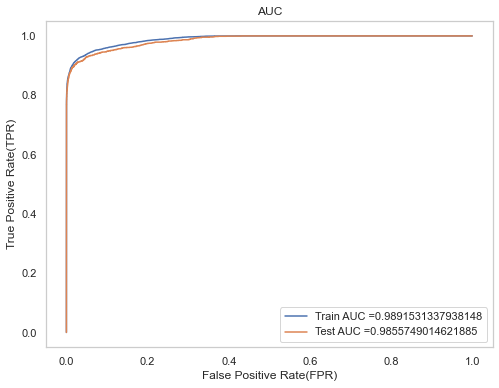

In [35]:
# Plotting the roc curve for the model
plt.figure(figsize=(8,6))
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid(color='black',lw=0.5)

In [36]:
# Function to find the best threshold value
def find_best_threshold(threshould, fpr, tpr):
 t = threshould[np.argmax(tpr*(1-fpr))]
 print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
 return t
def predict_with_best_t(proba, threshould):
  prediction=[]
  for i in proba:
    if i>=threshould:
      prediction.append(1)
    else:
      prediction.append(0)
  return prediction

In [37]:
# plotting confusion matrix for training dataset
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
l=predict_with_best_t(y_train_probs, best_t)
k=confusion_matrix(y_train,l)
print(k)

the maximum value of tpr*(1-fpr) 0.8970228839172825 for threshold 0.002
Train confusion matrix
[[4925328  158175]
 [    489    6104]]


<AxesSubplot:title={'center':'Train data '}>

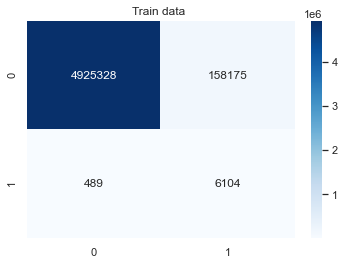

In [38]:
# Plotting heatmap for training data
plt.title("Train data ")
sns.heatmap(k, annot=True,fmt="d",cmap='Blues')

In [39]:
# Plotting confusion matrix for test data
best_t = find_best_threshold(te_thresholds, test_fpr, test_tpr)
print("Test confusion matrix")
l=predict_with_best_t(y_test_probs, best_t)
k=confusion_matrix(y_test,l)
print(k)

the maximum value of tpr*(1-fpr) 0.8861621236964562 for threshold 0.002
Test confusion matrix
[[1237780   33124]
 [    146    1474]]


<AxesSubplot:title={'center':'Test data '}>

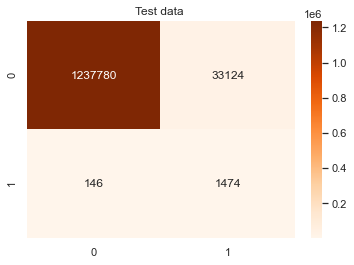

In [40]:
# Plotting heatmap for training data
plt.title("Test data ")
sns.heatmap(k, annot=True,fmt="d",cmap='Oranges')

* Here the accuracy is very high for both train data and test data
* But if we check the confusion matrix we can observe that number of truely classified "isfraud" is very less
* As we see it is an imbalaced data we can't totaly depend on this output so we have to balance our dataset.

## Now we will balance our imbalanced dataset by doing undersampling

In [41]:
#Doing Under sampling to make data balance
from imblearn.under_sampling import RandomUnderSampler                           
under_sampler = RandomUnderSampler()
X_res, y_res = under_sampler.fit_resample(data,result)

In [42]:
True_fraud=np.sum(y_res==1)
False_fraud=np.sum(y_res==0)
print(True_fraud)
print(False_fraud)

8213
8213


In [43]:
#Splitting the balance dataset for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.20,random_state=42)

In [44]:
le = preprocessing.LabelEncoder()
le.fit(data["type"])
train_type=le.transform(x_train["type"])
test_type=le.transform(x_test["type"])

In [45]:
le2=preprocessing.LabelEncoder()
le2.fit(data["nameOrig"])
train_nameOrig=le2.transform(x_train["nameOrig"])
test_nameOrig=le2.transform(x_test["nameOrig"])

In [46]:
le3=preprocessing.LabelEncoder()
le3.fit(data["nameDest"])
train_nameDest=le3.transform(x_train["nameDest"])
test_nameDest=le3.transform(x_test["nameDest"])

In [47]:
x_train.drop(["type","nameOrig","nameDest"],axis=1,inplace=True)

In [48]:
x_train["type"]=train_type
x_train["nameOrig"]=train_nameOrig
x_train["nameDest"]=train_nameDest

In [49]:
x_test.drop(["type","nameOrig","nameDest"],axis=1,inplace=True)

In [50]:
x_test["type"]=test_type
x_test["nameOrig"]=test_nameOrig
x_test["nameDest"]=test_nameDest

In [52]:
# Hyperparameter tuning using gridsearchcv
from sklearn.model_selection import GridSearchCV
parameters = {"max_depth":[1,2,3,4] }
clf = GridSearchCV(xgb.XGBClassifier(), parameters, cv=3, scoring='roc_auc',return_train_score=True,n_jobs=-1)
clf.fit(x_train,y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1, param_grid={'max_depth': [1, 2, 3, 4]},
             return_train_score=True, scoring='roc_auc')

Best Parameter {'max_depth': 3}


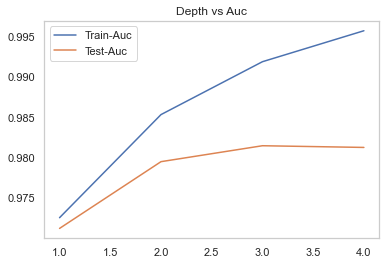

In [53]:
# Finding the best parameter for the model after hyperparameter tuning
import matplotlib.pyplot as plt
max_depth=[1,2,3,4]
df=pd.DataFrame.from_dict(clf.cv_results_)
train_auc=df['mean_train_score']
test_auc=df['mean_test_score']
plt.grid()
plt.plot(max_depth,train_auc,label="Train-Auc")
plt.plot(max_depth,test_auc,label="Test-Auc")
plt.legend()
plt.title("Depth vs Auc")
print("Best Parameter",clf.best_params_)

In [ ]:
# Fitting our model with the best parameter 
from sklearn.metrics import roc_curve, auc
model_set=xgb.XGBClassifier(max_depth=4)
model_set.fit(x_train,y_train)
y_train_probs = model_set.predict_proba(x_train)[:,1] # converting train and test output into probability
y_test_probs= model_set.predict_proba(x_test)[:,1]
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_probs) # storing values of fpr and tpr
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_probs)

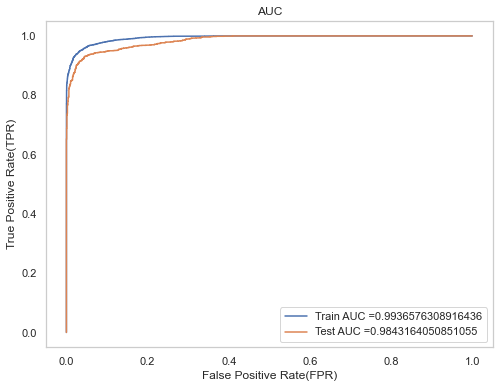

In [60]:
# Plotting the roc curve for the model
plt.figure(figsize=(8,6))
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid(color='black',lw=0.5)

In [55]:
# Function to find the best threshold value
def find_best_threshold(threshould, fpr, tpr):
 t = threshould[np.argmax(tpr*(1-fpr))]
 print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
 return t
def predict_with_best_t(proba, threshould):
  prediction=[]
  for i in proba:
    if i>=threshould:
      prediction.append(1)
    else:
      prediction.append(0)
  return prediction

In [56]:
# Plotting confusion matrix for train data
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
l=predict_with_best_t(y_train_probs, best_t)
k=confusion_matrix(y_train,l)
print(k)

the maximum value of tpr*(1-fpr) 0.9182605324552858 for threshold 0.4
Train confusion matrix
[[6351  213]
 [ 335 6241]]


<AxesSubplot:title={'center':'Train data '}>

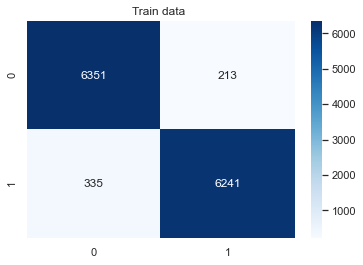

In [57]:
# Plotting heatmap for testing data
plt.title("Train data ")
sns.heatmap(k, annot=True,fmt="d",cmap='Blues')

In [58]:
# Plotting confusion matrix for test data
best_t = find_best_threshold(te_thresholds, test_fpr, test_tpr)
print("Test confusion matrix")
l=predict_with_best_t(y_test_probs, best_t)
k=confusion_matrix(y_test,l)
print(k)

the maximum value of tpr*(1-fpr) 0.8891933172137796 for threshold 0.44
Test confusion matrix
[[1575   74]
 [ 113 1524]]


<AxesSubplot:title={'center':'Test data '}>

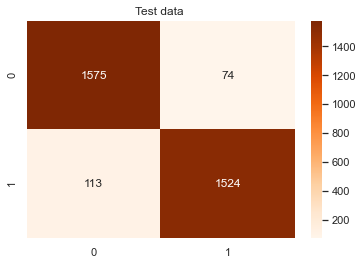

In [59]:
# Plotting heatmap for training data
plt.title("Test data ")
sns.heatmap(k, annot=True,fmt="d",cmap='Oranges')

* Here accuracy is very high
* As we see from confusion matrix we can conclude that this model has very good value in Truepositive and TrueNegetive as it is a balanced data so we can say that it will work well in unseen data

[0.02001311 0.08888297 0.         0.05300498 0.03892291 0.53899777
 0.24441983 0.00383088 0.01192756]


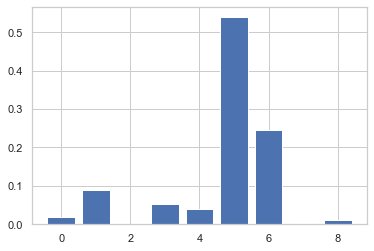

In [62]:
print(model_set.feature_importances_)
# plot
plt.bar(range(len(model_set.feature_importances_)), model_set.feature_importances_)
plt.show()

* From the chart of the most important features within the model, we can see some important points:
* The 'isFlaggedfraud' tag, which could be an important indicator for fraud attempts, does not matter within the model. According to the business rules established according to the dictionary, only 16 times there was a sign of fraud that actually occurred compared to the other 8197 times that occurred and were not reported.
* It is also noted that the type of movement being in the form of debit appears to be the safest while the transfer type needs more attention.
* Despite the strong correlation between oldBalanceOrg and newbalanceOrig, indicating some redundancy of information, both have a strong influence on fraud detection